In [2]:
import pandas as pd
import numpy as np

#### Question 1

In [3]:
df = pd.read_csv('vehicle.csv')

In [4]:
df.sample(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
474,82,40.0,73.0,141.0,57.0,8,153.0,44.0,19.0,133,173.0,342.0,153.0,75.0,11.0,9.0,181.0,187,car
394,90,49.0,83.0,187.0,63.0,7,176.0,37.0,21.0,154,205.0,467.0,222.0,70.0,1.0,2.0,189.0,195,car
510,86,43.0,70.0,126.0,56.0,6,148.0,46.0,19.0,145,166.0,317.0,171.0,86.0,6.0,9.0,179.0,182,bus
667,110,53.0,104.0,223.0,66.0,10,211.0,32.0,24.0,164,223.0,659.0,210.0,67.0,5.0,16.0,190.0,203,car
637,86,44.0,65.0,129.0,56.0,6,152.0,45.0,19.0,150,168.0,331.0,177.0,83.0,4.0,13.0,178.0,183,bus


In [5]:
df_enc=pd.get_dummies(df)

In [6]:
df_enc.shape

(846, 21)

In [7]:
df_enc.sample(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class_bus,class_car,class_van
723,105,46.0,100.0,195.0,61.0,9,193.0,34.0,22.0,150,...,557.0,161.0,65.0,5.0,9.0,194.0,202,0,1,0
512,103,54.0,107.0,189.0,56.0,11,223.0,30.0,25.0,174,...,729.0,200.0,70.0,0.0,29.0,187.0,201,0,1,0
89,80,37.0,57.0,116.0,55.0,6,125.0,54.0,18.0,125,...,229.0,132.0,81.0,8.0,5.0,178.0,184,0,1,0
760,107,45.0,92.0,197.0,62.0,10,188.0,35.0,22.0,148,...,526.0,159.0,64.0,12.0,20.0,195.0,203,0,1,0
288,96,47.0,103.0,215.0,69.0,10,200.0,33.0,23.0,147,...,598.0,200.0,73.0,6.0,6.0,187.0,194,0,1,0


Columns having missing values

In [8]:
df_enc.isnull().sum()[df_enc.isnull().sum() > 0].index

Index(['circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'scatter_ratio', 'elongatedness',
       'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1',
       'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1',
       'skewness_about', 'skewness_about.1', 'skewness_about.2'],
      dtype='object')

In [9]:
null_df = df_enc[df_enc['circularity'].isnull()|df_enc['distance_circularity'].isnull()|df_enc['radius_ratio'].isnull()|df_enc['pr.axis_aspect_ratio'].isnull()|df_enc['scatter_ratio'].isnull()|df_enc['elongatedness'].isnull()|df_enc['pr.axis_rectangularity'].isnull()|df_enc['scaled_variance'].isnull()|df_enc['scaled_variance.1'].isnull()|df_enc['scaled_radius_of_gyration'].isnull()|df_enc['scaled_radius_of_gyration.1'].isnull()|df_enc['skewness_about'].isnull()|df_enc['skewness_about.1'].isnull()|df_enc['skewness_about.2'].isnull()]

In [10]:
null_df.shape

(33, 21)

In [11]:
not_null_df = df_enc[~df_enc.index.isin(null_df.index)]

In [12]:
not_null_df.shape

(813, 21)

In [13]:
null_df.head(33)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class_bus,class_car,class_van
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,...,957.0,264.0,85.0,5.0,9.0,181.0,183,1,0,0
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,...,505.0,152.0,64.0,4.0,14.0,195.0,204,0,1,0
19,101,56.0,100.0,215.0,NaN,10,208.0,32.0,24.0,169,...,651.0,223.0,74.0,6.0,5.0,186.0,193,0,1,0
35,100,46.0,NaN,172.0,67.0,9,157.0,43.0,20.0,150,...,363.0,184.0,67.0,17.0,7.0,192.0,200,0,0,1
66,81,43.0,68.0,125.0,57.0,8,149.0,46.0,19.0,146,...,323.0,172.0,NaN,NaN,18.0,179.0,184,1,0,0
70,96,55.0,98.0,161.0,54.0,10,215.0,31.0,NaN,175,...,683.0,221.0,76.0,3.0,6.0,185.0,193,0,1,0
77,86,40.0,62.0,140.0,62.0,7,150.0,45.0,19.0,133,...,330.0,173.0,NaN,2.0,3.0,180.0,185,0,1,0
78,104,52.0,94.0,NaN,66.0,5,208.0,31.0,24.0,161,...,666.0,218.0,76.0,11.0,4.0,193.0,191,1,0,0
105,108,NaN,103.0,202.0,64.0,10,220.0,30.0,25.0,168,...,711.0,214.0,73.0,11.0,NaN,188.0,199,0,1,0
118,85,NaN,NaN,128.0,56.0,8,150.0,46.0,19.0,144,...,324.0,173.0,82.0,9.0,14.0,180.0,184,1,0,0


#### Filling the missing values using linear regression.  Instead of using the standard impute techniques of mean, mode & median

In [14]:
X=not_null_df.drop('radius_ratio',axis=1)

In [15]:
y=not_null_df['radius_ratio']

In [16]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,y,test_size=0.2, random_state=24)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

In [19]:
model.fit(xTrain,yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
model.score(xTest,yTest)

0.9860137745624046

In [21]:
x_null = null_df[null_df['radius_ratio'].isnull()]

In [22]:
x_null= x_null.drop('radius_ratio',axis=1)

In [23]:
x_null


,compactness,circularity,distance_circularity,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class_bus,class_car,class_van
9,93,44.0,98.0,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,0,1,0
78,104,52.0,94.0,66.0,5,208.0,31.0,24.0,161,227.0,666.0,218.0,76.0,11.0,4.0,193.0,191,1,0,0
159,91,45.0,75.0,57.0,6,150.0,44.0,19.0,146,170.0,335.0,180.0,66.0,16.0,2.0,193.0,198,0,1,0
287,88,43.0,84.0,55.0,11,154.0,44.0,19.0,150,174.0,350.0,164.0,73.0,6.0,2.0,185.0,196,0,0,1
345,101,54.0,106.0,57.0,7,236.0,28.0,26.0,164,256.0,833.0,253.0,81.0,6.0,14.0,185.0,185,1,0,0
467,96,54.0,104.0,58.0,10,215.0,31.0,24.0,175,221.0,682.0,222.0,75.0,13.0,23.0,186.0,194,0,1,0


In [24]:
values= model.predict(x_null)

In [25]:
values = values.astype('int64')

In [26]:
x_null['radius_ratio']=values

In [27]:
for x in x_null['radius_ratio'].iteritems():
    null_df.set_value(x[0],'radius_ratio',x[1])
    df_enc.set_value(x[0],'radius_ratio',x[1])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
null_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   0
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class_bus                      0
class_car                      0
class_van                      0
dtype: int64

In [29]:
null_df[null_df['skewness_about.2'].isnull()].isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               1
hollows_ratio                  0
class_bus                      0
class_car                      0
class_van                      0
dtype: int64

In [30]:
X=not_null_df.drop('skewness_about.2',axis=1)
y=not_null_df['skewness_about.2']
xTrain, xTest, yTrain, yTest = train_test_split(X,y,test_size=0.2, random_state=24)
model = LinearRegression()
model.fit(xTrain,yTrain)
model.score(xTest,yTest)

0.9551561486529337

In [31]:
x_null = null_df[null_df['skewness_about.2'].isnull()]
x_null= x_null.drop('skewness_about.2',axis=1)

In [32]:
values= model.predict(x_null)

In [33]:
values

array([197.75054775])

In [34]:
not_null_df['skewness_about.2'].unique()

array([187., 189., 188., 199., 180., 200., 193., 194., 196., 197., 186.,
       181., 198., 185., 179., 192., 191., 195., 190., 183., 184., 202.,
       201., 182., 176., 178., 203., 177., 204., 206.])

In [35]:
values = values.astype('int64')

In [36]:
x_null['skewness_about.2']=values

In [37]:
for x in x_null['skewness_about.2'].iteritems():
    null_df.set_value(x[0],'skewness_about.2',x[1])
    df_enc.set_value(x[0],'skewness_about.2',x[1])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
null_df[null_df['elongatedness'].isnull()].isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  1
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class_bus                      0
class_car                      0
class_van                      0
dtype: int64

In [39]:
X=not_null_df.drop('elongatedness',axis=1)
y=not_null_df['elongatedness']
xTrain, xTest, yTrain, yTest = train_test_split(X,y,test_size=0.2, random_state=24)
model = LinearRegression()
model.fit(xTrain,yTrain)
model.score(xTest,yTest)

0.9941102826236071

In [40]:
x_null = null_df[null_df['elongatedness'].isnull()]
x_null= x_null.drop('elongatedness',axis=1)

In [41]:
values= model.predict(x_null)

In [42]:
values

array([41.08101344])

In [43]:
not_null_df['elongatedness'].unique()

array([42., 45., 32., 46., 48., 54., 50., 43., 44., 37., 57., 36., 31.,
       55., 53., 33., 47., 40., 51., 26., 34., 52., 35., 30., 38., 56.,
       39., 58., 59., 49., 27., 41., 61., 28., 29.])

In [44]:
values = values.astype('int64')

In [45]:
x_null['elongatedness']=values

In [46]:
for x in x_null['elongatedness'].iteritems():
    null_df.set_value(x[0],'elongatedness',x[1])
    df_enc.set_value(x[0],'elongatedness',x[1])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
null_df[null_df['pr.axis_rectangularity'].isnull()].isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class_bus                      0
class_car                      0
class_van                      0
dtype: int64

In [48]:
X=not_null_df.drop('pr.axis_rectangularity',axis=1)
y=not_null_df['pr.axis_rectangularity']
xTrain, xTest, yTrain, yTest = train_test_split(X,y,test_size=0.2, random_state=24)
model = LinearRegression()
model.fit(xTrain,yTrain)
model.score(xTest,yTest)

0.988577087706542

In [49]:
x_null = null_df[null_df['pr.axis_rectangularity'].isnull()]
x_null= x_null.drop('pr.axis_rectangularity',axis=1)

In [50]:
values= model.predict(x_null)

In [51]:
values

array([24.31944527, 19.08474558, 18.77915515])

In [52]:
not_null_df['pr.axis_rectangularity'].unique()

array([20., 19., 23., 18., 17., 21., 24., 25., 22., 28., 27., 26., 29.])

In [53]:
values = values.astype('int64')

In [54]:
x_null['pr.axis_rectangularity']=values

In [55]:
for x in x_null['pr.axis_rectangularity'].iteritems():
    null_df.set_value(x[0],'pr.axis_rectangularity',x[1])
    df_enc.set_value(x[0],'pr.axis_rectangularity',x[1])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
null_df[null_df['scaled_variance.1'].isnull()].isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              2
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class_bus                      0
class_car                      0
class_van                      0
dtype: int64

In [57]:
X=not_null_df.drop('scaled_variance.1',axis=1)
y=not_null_df['scaled_variance.1']
xTrain, xTest, yTrain, yTest = train_test_split(X,y,test_size=0.2, random_state=24)
model = LinearRegression()
model.fit(xTrain,yTrain)
model.score(xTest,yTest)

0.9989577833796007

In [58]:
x_null = null_df[null_df['scaled_variance.1'].isnull()]
x_null= x_null.drop('scaled_variance.1',axis=1)

In [59]:
values= model.predict(x_null)

In [60]:
values

array([553.78128054, 684.08620406])

In [61]:
not_null_df['scaled_variance.1'].unique()

array([ 379.,  330.,  635.,  309.,  325.,  361.,  281.,  223.,  266.,
        224.,  349.,  345.,  465.,  624.,  206.,  485.,  686.,  354.,
        221.,  344.,  307.,  623.,  324.,  238.,  696.,  570.,  314.,
        356.,  293.,  304.,  641.,  402.,  340.,  346.,  691.,  336.,
        628.,  207.,  366.,  405.,  675.,  371.,  253.,  317.,  352.,
        404.,  299.,  355.,  661.,  341.,  956.,  265.,  512.,  653.,
        241.,  567.,  247.,  269.,  333.,  523.,  748.,  305.,  558.,
        732.,  466.,  227.,  338.,  571.,  445.,  328.,  343.,  671.,
        242.,  311.,  342.,  998.,  209.,  446.,  229.,  703.,  430.,
        583.,  363.,  312.,  683.,  308.,  337.,  602.,  321.,  326.,
        347.,  246.,  194.,  576.,  575.,  331.,  329.,  524.,  357.,
        315.,  192.,  351.,  611.,  712.,  463.,  370.,  319.,  216.,
        323.,  365.,  605.,  578.,  511.,  261.,  669.,  364.,  264.,
        230.,  373.,  670.,  406.,  728.,  387.,  332.,  360.,  279.,
        527.,  525.,

In [62]:
values = values.astype('int64')

In [63]:
x_null['scaled_variance.1']=values

In [64]:
for x in x_null['scaled_variance.1'].iteritems():
    null_df.set_value(x[0],'scaled_variance.1',x[1])
    df_enc.set_value(x[0],'scaled_variance.1',x[1])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
null_df.isnull().sum()[null_df.isnull().sum() > 0]

circularity                    5
distance_circularity           4
pr.axis_aspect_ratio           2
scatter_ratio                  1
scaled_variance                3
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
dtype: int64

In [66]:
null_df[null_df['skewness_about'].isnull()].isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           1
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    1
skewness_about                 6
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class_bus                      0
class_car                      0
class_van                      0
dtype: int64

In [67]:
not_null_df.corr()['skewness_about']

compactness                    0.231648
circularity                    0.141726
distance_circularity           0.110280
radius_ratio                   0.044693
pr.axis_aspect_ratio          -0.059244
max.length_aspect_ratio        0.016461
scatter_ratio                  0.070118
elongatedness                 -0.046621
pr.axis_rectangularity         0.078701
max.length_rectangularity      0.130356
scaled_variance                0.034228
scaled_variance.1              0.072393
scaled_radius_of_gyration      0.162397
scaled_radius_of_gyration.1   -0.088109
skewness_about                 1.000000
skewness_about.1              -0.022611
skewness_about.2               0.111135
hollows_ratio                  0.098128
class_bus                     -0.191264
class_car                      0.161430
class_van                      0.005507
Name: skewness_about, dtype: float64

In [68]:
X=not_null_df.drop(['skewness_about','scaled_radius_of_gyration.1','scatter_ratio','pr.axis_aspect_ratio'],axis=1)
y=not_null_df['skewness_about']
xTrain, xTest, yTrain, yTest = train_test_split(X,y,test_size=0.2, random_state=24)
model = LinearRegression()
model.fit(xTrain,yTrain)
model.score(xTest,yTest)

0.26149320906034823

In [69]:
x_null = null_df[null_df['skewness_about'].isnull()]
x_null= x_null.drop(['skewness_about','scaled_radius_of_gyration.1','scatter_ratio','pr.axis_aspect_ratio'],axis=1)

In [70]:
values= model.predict(x_null)

In [71]:
values

array([3.34287002, 3.3538559 , 5.3134433 , 7.5655726 , 8.45033968,
       7.28504292])

In [72]:
not_null_df['skewness_about'].unique()

array([ 6.,  9., 14., 13.,  3.,  2.,  5.,  8.,  4.,  0.,  7.,  1., 10.,
       20., 18., 11., 17., 16., 21., 12., 22., 15., 19.])

In [73]:
values = values.astype('int64')

In [74]:
x_null['skewness_about']=values

In [75]:
for x in x_null['skewness_about'].iteritems():
    null_df.set_value(x[0],'skewness_about',x[1])
    df_enc.set_value(x[0],'skewness_about',x[1])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [76]:
null_df.isnull().sum()[null_df.isnull().sum() > 0]

circularity                    5
distance_circularity           4
pr.axis_aspect_ratio           2
scatter_ratio                  1
scaled_variance                3
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about.1               1
dtype: int64

In [77]:
null_df[null_df['circularity'].isnull()].isnull().sum()

compactness                    0
circularity                    5
distance_circularity           1
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                1
scaled_variance.1              0
scaled_radius_of_gyration      1
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               1
skewness_about.2               0
hollows_ratio                  0
class_bus                      0
class_car                      0
class_van                      0
dtype: int64

In [78]:
not_null_df.corr()['circularity']

compactness                    0.689885
circularity                    1.000000
distance_circularity           0.797704
radius_ratio                   0.623950
pr.axis_aspect_ratio           0.155023
max.length_aspect_ratio        0.251619
scatter_ratio                  0.858149
elongatedness                 -0.825108
pr.axis_rectangularity         0.856137
max.length_rectangularity      0.965366
scaled_variance                0.806108
scaled_variance.1              0.850932
scaled_radius_of_gyration      0.935594
scaled_radius_of_gyration.1    0.049070
skewness_about                 0.141726
skewness_about.1              -0.001975
skewness_about.2              -0.113902
hollows_ratio                  0.049331
class_bus                      0.008459
class_car                      0.211185
class_van                     -0.255864
Name: circularity, dtype: float64

In [79]:
X=not_null_df.drop(['circularity','distance_circularity','scaled_variance','scaled_radius_of_gyration','skewness_about.1'],axis=1)
y=not_null_df['circularity']
xTrain, xTest, yTrain, yTest = train_test_split(X,y,test_size=0.2, random_state=24)
model = LinearRegression()
model.fit(xTrain,yTrain)
model.score(xTest,yTest)

0.969823151680319

In [80]:
x_null = null_df[null_df['circularity'].isnull()]
x_null= x_null.drop(['circularity','distance_circularity','scaled_variance','scaled_radius_of_gyration','skewness_about.1'],axis=1)

In [81]:
values= model.predict(x_null)

In [82]:
values

array([55.94945186, 53.41000655, 42.80897729, 41.69730845, 56.81501132])

In [83]:
not_null_df['circularity'].unique()

array([48., 41., 50., 44., 43., 34., 36., 46., 42., 49., 55., 54., 47.,
       37., 39., 53., 45., 38., 35., 56., 40., 59., 51., 58., 52., 57.,
       33.])

In [84]:
values = values.astype('int64')

In [85]:
x_null['circularity']=values

In [86]:
for x in x_null['circularity'].iteritems():
    null_df.set_value(x[0],'circularity',x[1])
    df_enc.set_value(x[0],'circularity',x[1])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [87]:
null_df.isnull().sum()[null_df.isnull().sum() > 0]

distance_circularity           4
pr.axis_aspect_ratio           2
scatter_ratio                  1
scaled_variance                3
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about.1               1
dtype: int64

In [88]:
null_df[null_df['distance_circularity'].isnull()].isnull().sum()

compactness                    0
circularity                    0
distance_circularity           4
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      1
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class_bus                      0
class_car                      0
class_van                      0
dtype: int64

In [89]:
X=not_null_df.drop(['distance_circularity','scaled_radius_of_gyration'],axis=1)
y=not_null_df['distance_circularity']
xTrain, xTest, yTrain, yTest = train_test_split(X,y,test_size=0.2, random_state=24)
model = LinearRegression()
model.fit(xTrain,yTrain)
model.score(xTest,yTest)

0.9463831244734842

In [90]:
x_null = null_df[null_df['distance_circularity'].isnull()]
x_null= x_null.drop(['distance_circularity','scaled_radius_of_gyration'],axis=1)

In [91]:
values= model.predict(x_null)

In [92]:
values

array([85.66339416, 68.05889456, 62.44870822, 94.55905645])

In [93]:
not_null_df['distance_circularity'].unique()

array([ 83.,  84., 106.,  82.,  70.,  73.,  66.,  62.,  74.,  85.,  79.,
       103.,  51.,  77., 100.,  75.,  53.,  64., 105.,  80.,  54.,  98.,
        63., 107.,  72.,  86.,  68., 104.,  87.,  76.,  81.,  71., 101.,
        96.,  78., 108.,  91.,  89.,  92.,  60.,  57.,  65.,  50.,  88.,
       109.,  95.,  90.,  94.,  58.,  69.,  47.,  40.,  59., 110.,  93.,
       102., 112.,  61.,  42.,  49.,  44.,  52.,  55.])

In [94]:
values = values.astype('int64')

In [95]:
x_null['distance_circularity']=values

In [96]:
for x in x_null['distance_circularity'].iteritems():
    null_df.set_value(x[0],'distance_circularity',x[1])
    df_enc.set_value(x[0],'distance_circularity',x[1])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [97]:
null_df.isnull().sum()[null_df.isnull().sum() > 0]

pr.axis_aspect_ratio           2
scatter_ratio                  1
scaled_variance                3
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about.1               1
dtype: int64

In [98]:
null_df[null_df['scaled_radius_of_gyration.1'].isnull()].isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    4
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class_bus                      0
class_car                      0
class_van                      0
dtype: int64

In [99]:
X=not_null_df.drop(['scaled_radius_of_gyration.1'],axis=1)
y=not_null_df['scaled_radius_of_gyration.1']
xTrain, xTest, yTrain, yTest = train_test_split(X,y,test_size=0.2, random_state=24)
model = LinearRegression()
model.fit(xTrain,yTrain)
model.score(xTest,yTest)

0.9135600118394284

In [100]:
x_null = null_df[null_df['scaled_radius_of_gyration.1'].isnull()]
x_null= x_null.drop(['scaled_radius_of_gyration.1'],axis=1)

In [101]:
values= model.predict(x_null)

In [102]:
values

array([82.71943036, 81.43382207, 70.23082617, 68.81608877])

In [103]:
not_null_df['scaled_radius_of_gyration.1'].unique()

array([ 70.,  72.,  73.,  63., 127.,  66.,  67.,  64.,  65.,  71.,  74.,
        80.,  75.,  82.,  68.,  69.,  76.,  83., 118.,  86.,  77.,  88.,
        62.,  79.,  78.,  81.,  87., 119.,  97.,  60.,  85.,  61.,  89.,
        90.,  84., 135.,  91.,  59.,  99.])

In [104]:
values = values.astype('int64')

In [105]:
x_null['scaled_radius_of_gyration.1']=values

In [106]:
for x in x_null['scaled_radius_of_gyration.1'].iteritems():
    null_df.set_value(x[0],'scaled_radius_of_gyration.1',x[1])
    df_enc.set_value(x[0],'scaled_radius_of_gyration.1',x[1])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [107]:
null_df.isnull().sum()[null_df.isnull().sum() > 0]

pr.axis_aspect_ratio         2
scatter_ratio                1
scaled_variance              3
scaled_radius_of_gyration    2
skewness_about.1             1
dtype: int64

In [108]:
null_df[null_df['scaled_variance'].isnull()].isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               1
skewness_about.2               0
hollows_ratio                  0
class_bus                      0
class_car                      0
class_van                      0
dtype: int64

In [109]:
X=not_null_df.drop(['scaled_variance','skewness_about.1'],axis=1)
y=not_null_df['scaled_variance']
xTrain, xTest, yTrain, yTest = train_test_split(X,y,test_size=0.2, random_state=24)
model = LinearRegression()
model.fit(xTrain,yTrain)
model.score(xTest,yTest)

0.9840757651152164

In [110]:
x_null = null_df[null_df['scaled_variance'].isnull()]
x_null= x_null.drop(['scaled_variance','skewness_about.1'],axis=1)

In [111]:
values= model.predict(x_null)

In [112]:
values

array([228.82807729, 173.88656519, 156.85110544])

In [113]:
not_null_df['scaled_variance'].unique()

array([176., 170., 223., 160., 241., 162., 141., 153., 148., 180., 173.,
       196., 227., 137., 202., 225., 175., 169., 164., 221., 143., 229.,
       217., 168., 165., 232., 186., 174., 272., 235., 135., 178., 191.,
       159., 172., 184., 181., 236., 275., 154., 222., 214., 145., 203.,
       231., 208., 210., 197., 171., 155., 278., 189., 142., 218., 179.,
       166., 237., 212., 177., 167., 132., 226., 151., 216., 219., 157.,
       224., 188., 161., 207., 280., 156., 152., 220., 266., 228., 185.,
       209., 204., 182., 200., 258., 146., 183., 163., 238., 134., 136.,
       130., 190., 158., 147., 140., 265., 194., 211., 138., 288., 206.,
       234., 243., 195., 213., 187., 205., 262., 320., 215., 150., 139.,
       267., 149., 193., 230., 254., 269., 264., 199., 192., 144., 131.,
       285., 246., 287., 240., 263.])

In [114]:
values = values.astype('int64')

In [115]:
x_null['scaled_variance']=values

In [116]:
for x in x_null['scaled_variance'].iteritems():
    null_df.set_value(x[0],'scaled_variance',x[1])
    df_enc.set_value(x[0],'scaled_variance',x[1])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [117]:
null_df.isnull().sum()[null_df.isnull().sum() > 0]

pr.axis_aspect_ratio         2
scatter_ratio                1
scaled_radius_of_gyration    2
skewness_about.1             1
dtype: int64

In [118]:
null_df[null_df['pr.axis_aspect_ratio'].isnull()].isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class_bus                      0
class_car                      0
class_van                      0
dtype: int64

In [119]:
X=not_null_df.drop(['pr.axis_aspect_ratio'],axis=1)
y=not_null_df['pr.axis_aspect_ratio']
xTrain, xTest, yTrain, yTest = train_test_split(X,y,test_size=0.2, random_state=24)
model = LinearRegression()
model.fit(xTrain,yTrain)
model.score(xTest,yTest)

0.9759975629026958

In [120]:
x_null = null_df[null_df['pr.axis_aspect_ratio'].isnull()]
x_null= x_null.drop(['pr.axis_aspect_ratio'],axis=1)

In [121]:
values= model.predict(x_null)

In [122]:
values

array([68.33374348, 68.47838238])

In [123]:
not_null_df['pr.axis_aspect_ratio'].unique()

array([ 72.,  57.,  66.,  63., 103.,  65.,  61.,  55.,  68.,  58.,  71.,
        52.,  69.,  64.,  59., 126.,  54.,  73.,  67.,  51.,  70.,  53.,
        50.,  56.,  74.,  62.,  60.,  76.,  75.,  49., 133.,  47., 102.,
       138.,  48.,  97., 105.])

In [124]:
values = values.astype('int64')

In [125]:
x_null['pr.axis_aspect_ratio']=values

In [126]:
for x in x_null['pr.axis_aspect_ratio'].iteritems():
    null_df.set_value(x[0],'pr.axis_aspect_ratio',x[1])
    df_enc.set_value(x[0],'pr.axis_aspect_ratio',x[1])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [127]:
null_df.isnull().sum()[null_df.isnull().sum() > 0]

scatter_ratio                1
scaled_radius_of_gyration    2
skewness_about.1             1
dtype: int64

In [128]:
null_df[null_df['scaled_radius_of_gyration'].isnull()].isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class_bus                      0
class_car                      0
class_van                      0
dtype: int64

In [129]:
X=not_null_df.drop(['scaled_radius_of_gyration'],axis=1)
y=not_null_df['scaled_radius_of_gyration']
xTrain, xTest, yTrain, yTest = train_test_split(X,y,test_size=0.2, random_state=24)
model = LinearRegression()
model.fit(xTrain,yTrain)
model.score(xTest,yTest)

0.9230959661836341

In [130]:
x_null = null_df[null_df['scaled_radius_of_gyration'].isnull()]
x_null= x_null.drop(['scaled_radius_of_gyration'],axis=1)

In [131]:
values= model.predict(x_null)

In [132]:
values

array([160.48429292, 162.66948454])

In [133]:
not_null_df['scaled_radius_of_gyration'].unique()

array([184., 158., 220., 127., 188., 172., 164., 112., 118., 192., 161.,
       206., 246., 125., 151., 133., 177., 141., 224., 174., 139., 216.,
       163., 120., 204., 130., 200., 218., 186., 202., 232., 189., 156.,
       179., 146., 245., 165., 230., 119., 176., 212., 142., 185., 159.,
       183., 171., 209., 147., 210., 152., 214., 116., 144., 148., 257.,
       162., 129., 132., 229., 155., 234., 170., 201., 150., 137., 167.,
       173., 143., 187., 136., 138., 194., 153., 157., 198., 131., 168.,
       134., 145., 115., 178., 199., 195., 154., 149., 239., 140., 217.,
       124., 190., 242., 135., 166., 238., 121., 128., 191., 123., 219.,
       181., 180., 213., 175., 197., 211., 126., 249., 203., 205., 160.,
       222., 247., 221., 226., 261., 231., 236., 169., 235., 182., 262.,
       193., 117., 223., 250., 196., 243., 113., 228., 240., 241., 244.,
       109., 207., 268., 260., 215., 208., 237., 255., 114.])

In [134]:
values = values.astype('int64')

In [135]:
x_null['scaled_radius_of_gyration']=values

In [136]:
for x in x_null['scaled_radius_of_gyration'].iteritems():
    null_df.set_value(x[0],'scaled_radius_of_gyration',x[1])
    df_enc.set_value(x[0],'scaled_radius_of_gyration',x[1])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [137]:
null_df.isnull().sum()[null_df.isnull().sum() > 0]

scatter_ratio       1
skewness_about.1    1
dtype: int64

In [138]:
null_df[null_df['scatter_ratio'].isnull()].isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class_bus                      0
class_car                      0
class_van                      0
dtype: int64

In [139]:
X=not_null_df.drop(['scatter_ratio'],axis=1)
y=not_null_df['scatter_ratio']
xTrain, xTest, yTrain, yTest = train_test_split(X,y,test_size=0.2, random_state=24)
model = LinearRegression()
model.fit(xTrain,yTrain)
model.score(xTest,yTest)

0.9994534257805912

In [140]:
x_null = null_df[null_df['scatter_ratio'].isnull()]
x_null= x_null.drop(['scatter_ratio'],axis=1)

In [141]:
values= model.predict(x_null)

In [142]:
values

array([116.03388976])

In [143]:
not_null_df['scatter_ratio'].unique()

array([162., 149., 207., 144., 153., 137., 122., 133., 123., 152., 174.,
       204., 118., 177., 216., 154., 150., 143., 147., 128., 218., 192.,
       146., 155., 140., 142., 208., 164., 151., 205., 119., 158., 213.,
       159., 130., 148., 156., 163., 210., 257., 185., 157., 209., 193.,
       184., 225., 190., 224., 176., 126., 195., 172., 127., 261., 171.,
       125., 169., 197., 145., 214., 201., 114., 194., 221., 173., 134.,
       160., 121., 199., 186., 161., 222., 136., 187., 250., 202., 166.,
       132., 220., 211., 247., 116., 203., 181., 240., 219., 212., 138.,
       131., 117., 112., 165., 215., 226., 129., 175., 135., 217., 200.,
       241., 198., 120., 260., 188., 170., 234., 183., 168., 167., 227.,
       139., 206., 141., 238., 178., 223., 252., 239., 115., 191., 179.,
       251., 262., 196., 180., 236., 189., 237., 265.])

In [144]:
values = values.astype('int64')

In [145]:
x_null['scatter_ratio']=values

In [146]:
for x in x_null['scatter_ratio'].iteritems():
    null_df.set_value(x[0],'scatter_ratio',x[1])
    df_enc.set_value(x[0],'scatter_ratio',x[1])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [147]:
null_df.isnull().sum()[null_df.isnull().sum() > 0]

skewness_about.1    1
dtype: int64

In [148]:
null_df[null_df['skewness_about.1'].isnull()].isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               1
skewness_about.2               0
hollows_ratio                  0
class_bus                      0
class_car                      0
class_van                      0
dtype: int64

In [149]:
X=not_null_df.drop(['skewness_about.1'],axis=1)
y=not_null_df['skewness_about.1']
xTrain, xTest, yTrain, yTest = train_test_split(X,y,test_size=0.2, random_state=24)
model = LinearRegression()
model.fit(xTrain,yTrain)
model.score(xTest,yTest)

0.40509949558920166

In [150]:
x_null = null_df[null_df['skewness_about.1'].isnull()]
x_null= x_null.drop(['skewness_about.1'],axis=1)

In [151]:
values= model.predict(x_null)

In [152]:
values

array([16.94289542])

In [153]:
not_null_df['skewness_about.1'].unique()

array([16., 14.,  9., 10., 11.,  1.,  3., 26., 13.,  2.,  6.,  4., 28.,
        7., 20., 38., 25., 15.,  0.,  5.,  8., 24., 21., 23., 30., 18.,
       12., 29., 27., 33., 32., 41., 39., 17., 22., 19., 35., 31., 36.,
       40., 34.])

In [154]:
values = values.astype('int64')

In [155]:
x_null['skewness_about.1']=values

In [156]:
for x in x_null['skewness_about.1'].iteritems():
    null_df.set_value(x[0],'skewness_about.1',x[1])
    df_enc.set_value(x[0],'skewness_about.1',x[1])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [157]:
df_enc.isnull().sum()[df_enc.isnull().sum() > 0].index

Index([], dtype='object')

In [158]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

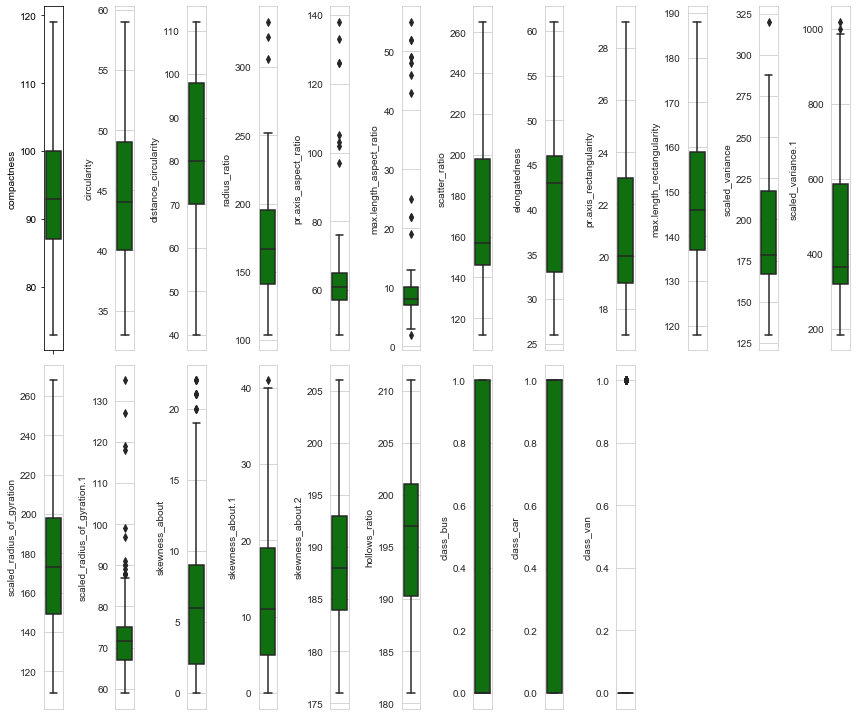

In [159]:
l = df_enc.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_enc[l[i]],color='green',orient='v')
    plt.tight_layout()

Features with outliers:-

radius_ratio

pr.axis_aspect_ratio

max.length_aspect_ratio

scaled_variance

scaled_variance_1

scaled_radius_of_gyration_1

skewness_about

skewness_about_1

Outliers are identified and not removed.

#### Question 2

In [160]:
df_enc.corr()[['class_car','class_van','class_bus']]

,class_car,class_van,class_bus
compactness,0.308819,-0.209965,-0.149396
circularity,0.196820,-0.250744,0.018178
distance_circularity,0.437082,-0.309003,-0.199970
radius_ratio,0.352455,-0.361929,-0.051906
pr.axis_aspect_ratio,-0.088072,-0.030429,0.130185
max.length_aspect_ratio,0.056862,0.138234,-0.199056
scatter_ratio,0.368249,-0.455714,0.020990
elongatedness,-0.368141,0.497688,-0.061819
pr.axis_rectangularity,0.366302,-0.429861,-0.001856
max.length_rectangularity,0.137634,-0.107919,-0.052675


Independent variables are weakly correlated with the dependent variable.  

We have features both positively & negatively correlated.  But none of them are strongly correlated.

In [161]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 21 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

#### Question 3

In [162]:
X=df_enc.drop(['class_van','class_bus','class_car'],axis=1)

In [163]:
from scipy.stats import zscore
X_scaled=X.apply(zscore)

In [164]:
cov=np.cov(X_scaled.T)

In [165]:
from numpy import linalg as LA
w, v = LA.eig(cov)
w

array([9.44140211e+00, 3.02412423e+00, 1.90094784e+00, 1.17810684e+00,
       9.16636262e-01, 5.35046553e-01, 3.56621759e-01, 2.20519525e-01,
       1.57750912e-01, 9.13987627e-02, 6.29894680e-02, 4.39261418e-02,
       3.50017207e-02, 2.12492763e-02, 1.60528863e-02, 1.29064318e-02,
       6.25762808e-03, 3.63434436e-04])

In [166]:
eig_sum = sum(w)

In [167]:
explained_variance=[x/sum(w) * 100 for x in w]


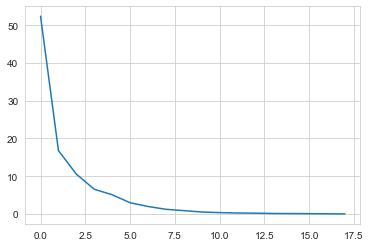

In [168]:
import matplotlib.pyplot as plt
plt.plot(sorted(explained_variance,reverse=True))
plt.show()

In [169]:
sum_val =0
idx =0
for index, value in enumerate(sorted(explained_variance,reverse=True)): 
    sum_val = sum_val+value
    idx = index
    print(index,sum_val,value)
    if sum_val >= 95:
        break
print(str(idx+1)+" values contribute for 95%+")

0 52.39023365396702 52.39023365396702
1 69.17106484370954 16.78083118974252
2 79.71940291820688 10.548338074497337
3 86.25670446781079 6.537301549603904
4 91.3431087303862 5.086404262575418
5 94.31207601089915 2.968967280512942
6 96.29096612490657 1.9788901140074286
7 values contribute for 95%+


In [170]:
from sklearn.decomposition import PCA

In [171]:
pca = PCA(n_components=7)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [172]:
pca.components_

array([[ 3.60866934e-02,  2.83512625e-02,  7.55279000e-02,
         1.32570201e-01,  4.82136730e-03,  3.99572580e-03,
         1.77227919e-01, -4.01217638e-02,  1.37540032e-02,
         6.25401806e-02,  1.60482376e-01,  9.44369116e-01,
         1.40541945e-01, -6.88167622e-04,  2.09478891e-03,
         9.53330776e-03,  3.47833048e-04,  4.46765494e-03],
       [ 5.12018488e-02, -2.71165563e-02,  1.09248017e-01,
         8.51864450e-01,  2.43244195e-01,  8.10573063e-02,
         3.49405240e-03, -3.76646113e-02, -3.23064040e-03,
        -6.70422615e-02,  1.58364304e-01, -1.16624290e-01,
        -2.73072738e-01, -1.00289071e-01, -8.15079011e-03,
         5.06119258e-02,  1.56327546e-01,  1.92321435e-01],
       [-3.64590180e-02,  1.20496316e-01,  1.89583753e-02,
         2.42704869e-01,  1.58359656e-01,  8.17147360e-02,
        -7.92527589e-03, -1.02265925e-02, -1.84924976e-03,
         2.62999801e-01,  1.33805652e-01, -2.01268814e-01,
         8.42138029e-01,  1.24903381e-01,  3.30094854e

In [173]:
pca.explained_variance_ratio_

array([0.95926381, 0.01796226, 0.01195578, 0.00394561, 0.00196783,
       0.00133591, 0.00114952])

In [174]:
X_pca = pca.transform(X)

In [175]:
X_pca.shape

(846, 7)

In [176]:
df['class'].count()

846

In [177]:
df_pca = pd.DataFrame(X_pca)

In [178]:
df_pca.sample(5)

,0,1,2,3,4,5,6
69,130.918445,26.092613,24.230726,1.607572,-12.335780,-12.633422,7.170471
82,-216.454836,-3.532538,-30.573890,-2.672175,-9.819089,12.323869,-8.083116
5,535.628780,-73.315360,-8.176544,21.387324,-8.273171,-6.689684,-13.813090
796,-238.396643,-8.291383,-4.923401,-16.989404,-5.651765,-8.517115,-0.981850
667,235.989857,22.189678,7.036961,-9.325264,0.048850,-2.278661,3.344810


In [179]:
df_pca['class']=df['class']

In [180]:
df_pca.head()

,0,1,2,3,4,5,6,class
0,-57.317052,12.568510,24.804490,-9.895484,7.360713,2.758052,9.587206,van
1,-116.900068,-9.433109,-3.875719,-6.498923,8.162292,6.003565,-6.863365,van
2,211.542032,8.027694,18.117811,-3.192612,-1.561543,-4.191214,-5.122010,car
3,-141.282400,20.345864,-23.683342,-15.173444,-1.911915,12.120601,0.225277,van
4,-98.400694,51.258817,67.956364,79.238029,15.563084,22.094282,-8.851442,bus


In [181]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [182]:
df_pca['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

In [183]:
di = {"van": 1, "car":2,"bus":3}

In [184]:
df_pca.replace({"class": di},inplace =True)

In [185]:
df_pca.head()

,0,1,2,3,4,5,6,class
0,-57.317052,12.568510,24.804490,-9.895484,7.360713,2.758052,9.587206,1
1,-116.900068,-9.433109,-3.875719,-6.498923,8.162292,6.003565,-6.863365,1
2,211.542032,8.027694,18.117811,-3.192612,-1.561543,-4.191214,-5.122010,2
3,-141.282400,20.345864,-23.683342,-15.173444,-1.911915,12.120601,0.225277,1
4,-98.400694,51.258817,67.956364,79.238029,15.563084,22.094282,-8.851442,3


In [186]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 8 columns):
0        846 non-null float64
1        846 non-null float64
2        846 non-null float64
3        846 non-null float64
4        846 non-null float64
5        846 non-null float64
6        846 non-null float64
class    846 non-null int64
dtypes: float64(7), int64(1)
memory usage: 53.0 KB


#### Question 4

In [187]:
from sklearn import svm

In [188]:
from sklearn.model_selection import GridSearchCV

In [189]:
X=df_pca.drop('class',axis=1)

In [190]:
y = df_pca['class']

In [191]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,y,test_size=0.3, random_state=24,stratify=y)

In [192]:
svc = svm.SVC()

In [193]:
parameters ={'C': [0.01, 0.05, 0.5, 1],
             'kernel':('linear', 'rbf')
    
}

In [194]:
clf = GridSearchCV(svc, parameters, cv=10)
clf.fit(xTrain, yTrain)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [195]:
clf.best_params_

{'C': 0.05, 'kernel': 'linear'}

In [196]:
model = clf.best_estimator_

In [197]:
pred = model.predict(xTest)

In [198]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(yTest, pred))
print("Test accuracy is", accuracy_score(yTest,pred))

[[ 58   2   0]
 [  9 111   9]
 [  4   6  55]]
Test accuracy is 0.8818897637795275


In [199]:
from sklearn.model_selection import StratifiedKFold

In [200]:
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=24)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
   
    model.fit(xtr,ytr)
    pred = model.predict(xvl)
    score = accuracy_score(yvl,pred)
    print('Accuracy score:',score)
    cv_score.append(score)    
    i+=1

1 of KFold 5
Accuracy score: 0.8176470588235294
2 of KFold 5
Accuracy score: 0.7941176470588235
3 of KFold 5
Accuracy score: 0.8352941176470589
4 of KFold 5
Accuracy score: 0.7633136094674556
5 of KFold 5
Accuracy score: 0.9101796407185628


In [201]:
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))

Cv [0.8176470588235294, 0.7941176470588235, 0.8352941176470589, 0.7633136094674556, 0.9101796407185628] 
Mean cv Score 0.824110414743086


In [202]:
mean = np.mean(cv_score)

sd = np.std(cv_score)

In [203]:
#The values for const are provided from statistics, and common values used are:
a = 1.64 #(90%)
b = 1.96 #(95%)
c = 2.33 #(98%)
d = 2.58 #(99%)

In [204]:
def conf_calc(percentage):
    upper = mean + (percentage * sd)
    lower = mean - (percentage * sd)
    return (lower,upper)

In [211]:
ninety =conf_calc(a)

print("90% confidence that model has accuracy between {:.2f}% & {:.2f}%".format(ninety[0]*100,ninety[1]*100))

90% confidence that model has accuracy between 74.32% & 90.50%


In [213]:
ninetyfive =conf_calc(b)


print("95% confidence that model has accuracy between {:.2f}% & {:.2f}%".format(ninetyfive[0]*100,ninetyfive[1]*100))

95% confidence that model has accuracy between 72.74% & 92.08%


In [214]:
ninetyeight =conf_calc(c)


print("98% confidence that model has accuracy between {:.2f}% & {:.2f}%".format(ninetyeight[0]*100,ninetyeight[1]*100))

98% confidence that model has accuracy between 70.92% & 93.91%


In [215]:
ninetynine =conf_calc(d)


print("99% confidence that model has accuracy between {:.2f}% & {:.2f}%".format(ninetynine[0]*100,ninetynine[1]*100))

99% confidence that model has accuracy between 69.68% & 95.14%
